# Examples in Python

## Lewiston-Clarkston Valley Formaldehyde Study (2016)

Requirements:
* [pandas](http://pandas.pydata.org)

### Basic setup

In [1]:
%matplotlib inline

import pandas as pd

In [2]:
%ls /b
# optional `/b` gives prettier output on Windows

.ipynb_checkpoints
CO_1min_20160630.csv
CO_30min_20160630.csv
Examples in Python.ipynb
Lewiston_Rack160630.txt
li840a_20160707.txt
NONO2_1min_20160630.csv
NONO2_30min_20160630.csv
O3_1min_20160630.csv
O3_30min_20160630.csv
readme.md
SO2_1min_20160630.csv
SO2_30min_20160630.csv


### Importing

#### Rack Files (DAQFactory)

<http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table>

In [3]:
rack = pd.read_csv('Lewiston_Rack160630.txt',
                   # HINT indexing begins with 0
                   header=0, # headers 1st row
                   index_col=0, # timestamps 1st column
                   # specify as seconds to recognize as epoch timestamp.. BUT
                   # it's local time (i.e. no timezone conversion required)
                   # (Section 9.10.3, http://www.azeotech.com/dl/usersguide.pdf)
                   date_parser=lambda x: pd.to_datetime(x, unit='s'),
                   parse_dates=True)

rack.head() # try `.tail()` to see the end instead

,LabjackU3_T,LI840A_CO2,LI840A_H2O,TAPI_CO,TAPI_NO,TAPI_NO2,TAPI_NOx,TAPI_O3,TAPI_SO2,TSI_flow,...,WXT_Pa,WXT_Rc,WXT_Rd,WXT_Ri,WXT_Rp,WXT_Sm,WXT_Sn,WXT_Sx,WXT_Ta,WXT_Ua
TheTime,,,,,,,,,,,,,,,,,,,,,
2016-06-30 00:01:14,20.43913,450.8072,10.95844,193.2129,3.356120,2.408854,5.706380,28.62710,0.206505,1.380509,...,977.2,NaN,NaN,NaN,NaN,2.400000,2.316667,2.496667,23.20000,37.89333
2016-06-30 00:02:14,20.57796,449.3582,10.96617,193.3431,3.372396,2.552083,5.887044,29.22985,0.191008,1.433969,...,977.2,NaN,NaN,NaN,NaN,2.290000,2.190000,2.373333,23.28000,37.51000
2016-06-30 00:03:14,20.77096,446.7017,10.89469,193.4733,3.408203,2.690430,6.022135,29.64040,0.186178,1.437424,...,977.2,NaN,NaN,NaN,NaN,2.530000,2.433333,2.630000,23.38667,37.38667
2016-06-30 00:04:14,21.03507,454.7920,10.93333,193.3919,3.471680,2.815755,6.210938,29.46129,0.216567,1.442756,...,977.2,NaN,NaN,NaN,NaN,2.893333,2.753333,3.023333,23.48000,37.16667
2016-06-30 00:05:14,21.28902,449.0362,10.82771,193.1966,3.494466,2.989909,6.386719,29.23287,0.214152,1.415293,...,977.2,NaN,NaN,NaN,NaN,3.500000,3.360000,3.650000,23.59667,37.13333


http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling

In [4]:
rack = rack.resample('T').first() # align to whole minutes (not in-place operation)
rack.head()

,LabjackU3_T,LI840A_CO2,LI840A_H2O,TAPI_CO,TAPI_NO,TAPI_NO2,TAPI_NOx,TAPI_O3,TAPI_SO2,TSI_flow,...,WXT_Pa,WXT_Rc,WXT_Rd,WXT_Ri,WXT_Rp,WXT_Sm,WXT_Sn,WXT_Sx,WXT_Ta,WXT_Ua
TheTime,,,,,,,,,,,,,,,,,,,,,
2016-06-30 00:01:00,20.43913,450.8072,10.95844,193.2129,3.356120,2.408854,5.706380,28.62710,0.206505,1.380509,...,977.2,NaN,NaN,NaN,NaN,2.400000,2.316667,2.496667,23.20000,37.89333
2016-06-30 00:02:00,20.57796,449.3582,10.96617,193.3431,3.372396,2.552083,5.887044,29.22985,0.191008,1.433969,...,977.2,NaN,NaN,NaN,NaN,2.290000,2.190000,2.373333,23.28000,37.51000
2016-06-30 00:03:00,20.77096,446.7017,10.89469,193.4733,3.408203,2.690430,6.022135,29.64040,0.186178,1.437424,...,977.2,NaN,NaN,NaN,NaN,2.530000,2.433333,2.630000,23.38667,37.38667
2016-06-30 00:04:00,21.03507,454.7920,10.93333,193.3919,3.471680,2.815755,6.210938,29.46129,0.216567,1.442756,...,977.2,NaN,NaN,NaN,NaN,2.893333,2.753333,3.023333,23.48000,37.16667
2016-06-30 00:05:00,21.28902,449.0362,10.82771,193.1966,3.494466,2.989909,6.386719,29.23287,0.214152,1.415293,...,977.2,NaN,NaN,NaN,NaN,3.500000,3.360000,3.650000,23.59667,37.13333


#### CO2/H2O Analyzer Files (LI-840A Software)

In [5]:
li840a_1hz = pd.read_table('li840a_20160707.txt', # table for tab-separated
                           header=1, # header 1st row names 2nd
                           parse_dates={'timestamp': [0,1]}, # combine 1st, 2nd col
                           index_col=0) # dates 1st col
li840a_1hz.head()

,CO2(ppm),H2O(ppt),H2O(C),Cell_Temperature(C),Cell_Pressure(kPa)
timestamp,,,,,
2016-07-07 16:42:12,420.87,9.27,4.72,51.25,92.66
2016-07-07 16:42:13,420.28,9.24,4.67,51.23,92.65
2016-07-07 16:42:14,420.38,9.28,4.73,51.25,92.67
2016-07-07 16:42:15,421.03,9.27,4.72,51.25,92.67
2016-07-07 16:42:16,420.42,9.28,4.73,51.27,92.66


In [6]:
li840a = li840a_1hz.resample('T').mean() # downsample to 1-min
li840a.head()

## HINT `.median()` is arguably a better choice -- see cell [25]

,CO2(ppm),H2O(ppt),H2O(C),Cell_Temperature(C),Cell_Pressure(kPa)
timestamp,,,,,
2016-07-07 16:42:00,420.595000,9.314318,4.789091,51.258636,92.669318
2016-07-07 16:43:00,420.203860,9.389474,4.905263,51.259825,92.667018
2016-07-07 16:44:00,420.131500,9.449500,4.997333,51.260667,92.668167
2016-07-07 16:45:00,420.172167,9.494000,5.066833,51.259000,92.695500
2016-07-07 16:46:00,420.326000,9.604833,5.233833,51.259833,92.693500


In [7]:
li840a_1hz.resample('1h').max().head() # ex: to hourly values, by max value

,CO2(ppm),H2O(ppt),H2O(C),Cell_Temperature(C),Cell_Pressure(kPa)
timestamp,,,,,
2016-07-07 16:00:00,423.32,10.07,5.91,51.29,92.74
2016-07-07 17:00:00,420.17,10.39,6.38,51.29,92.76
2016-07-07 18:00:00,426.26,10.60,6.65,51.29,92.77
2016-07-07 19:00:00,439.98,11.15,7.41,51.31,92.81
2016-07-07 20:00:00,441.56,11.21,7.48,51.31,92.86


#### Teledyne Analyzer Files (APICOM)

In [8]:
def read_tapi(filepath): ## FIRST DRAFT...
    return pd.read_csv(filepath,
                       header=0, # names 1st row
                       index_col=0, # timestamps 1st col
                       parse_dates=True, # US format (MM/DD/YYYY)
                       skipinitialspace=True) # has spaces and commas

In [9]:
co = read_tapi('CO_1min_20160630.csv')
co.head()

,CONC1-AVG (PPM),STABIL-AVG (PPM)
Time Stamp,,
2016-06-27 12:53:01,0.326282,0.021076
2016-06-27 12:54:01,0.322445,0.019224
2016-06-27 12:55:01,0.320961,0.019224
2016-06-27 12:56:01,0.322613,0.016943
2016-06-27 12:57:01,0.326330,0.016943


http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html

In [10]:
co = co.shift(-1, freq='s') # roll timestamps back to whole minute values
co.head()

,CONC1-AVG (PPM),STABIL-AVG (PPM)
Time Stamp,,
2016-06-27 12:53:00,0.326282,0.021076
2016-06-27 12:54:00,0.322445,0.019224
2016-06-27 12:55:00,0.320961,0.019224
2016-06-27 12:56:00,0.322613,0.016943
2016-06-27 12:57:00,0.326330,0.016943


http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

In [11]:
co.rename(columns=lambda s: s.replace(' ',''), inplace=True) # remove spaces from column names
co.head()

,CONC1-AVG(PPM),STABIL-AVG(PPM)
Time Stamp,,
2016-06-27 12:53:00,0.326282,0.021076
2016-06-27 12:54:00,0.322445,0.019224
2016-06-27 12:55:00,0.320961,0.019224
2016-06-27 12:56:00,0.322613,0.016943
2016-06-27 12:57:00,0.326330,0.016943


In [12]:
co.index.get_duplicates() # duplicate rows correspond to hourly downloads by APICOM... (ugh)

DatetimeIndex(['2016-06-30 10:11:00', '2016-06-30 11:11:00',
               '2016-06-30 12:11:00', '2016-06-30 13:11:00',
               '2016-06-30 14:11:00', '2016-06-30 15:11:00',
               '2016-06-30 16:11:00', '2016-06-30 17:11:00',
               '2016-06-30 18:11:00', '2016-06-30 19:11:00',
               ...
               '2016-07-08 12:11:00', '2016-07-08 12:12:00',
               '2016-07-08 13:11:00', '2016-07-08 13:12:00',
               '2016-07-08 14:11:00', '2016-07-08 14:12:00',
               '2016-07-08 15:11:00', '2016-07-08 15:12:00',
               '2016-07-08 16:11:00', '2016-07-08 16:12:00'],
              dtype='datetime64[ns]', length=260, freq=None)

In [13]:
# to remove dups, group by timestamps then pick first row of each group
co = co.groupby(level=0).first()

len(co.index.get_duplicates()) # now check... should be 0

0

In [14]:
## NOW UPDATE THE IMPORT FUNCTION...
def read_tapi(filepath):
    df =  pd.read_csv(filepath,
                      header=0, # names 1st row
                      index_col=0, # timestamps 1st col
                      parse_dates=True, # US format (MM/DD/YYYY)
                      skipinitialspace=True) # has spaces and commas
    df = df.shift(-1, freq='s')
    df.rename(columns=lambda s: s.replace(' ',''), inplace=True)
    if len(df.index.get_duplicates()):
        df = df.groupby(level=0).first()
    return df

In [15]:
nox = read_tapi('NONO2_1min_20160630.csv')
nox.head()

,NOXCNC1-AVG(PPB),NOCNC1-AVG(PPB),NO2CNC1-AVG(PPB),STABIL-AVG(PPM)
Time Stamp,,,,
2016-06-27 12:53:00,7.5643,2.1399,5.4245,0.0957
2016-06-27 12:54:00,7.3682,2.0629,5.3053,0.1720
2016-06-27 12:55:00,7.1038,1.9771,5.1268,0.2378
2016-06-27 12:56:00,6.8719,1.9167,4.9553,0.2733
2016-06-27 12:57:00,6.7139,1.8708,4.8430,0.2680


In [16]:
o3 = read_tapi('O3_1min_20160630.csv')
o3.head()

,CONC1-AVG(PPB)
Time Stamp,
2016-06-27 12:17:00,41.4
2016-06-27 12:18:00,42.3
2016-06-27 12:20:00,40.2
2016-06-27 12:21:00,39.1
2016-06-27 12:22:00,39.9


In [17]:
so2 = read_tapi('SO2_1min_20160630.csv')
so2.head()

,CONC1-AVG(PPB),STABIL-AVG(PPB)
Time Stamp,,
2016-06-27 12:42:00,0.3592,0.0143
2016-06-27 12:43:00,0.3628,0.0085
2016-06-27 12:44:00,0.3781,0.0062
2016-06-27 12:45:00,0.4011,0.0127
2016-06-27 12:46:00,0.4228,0.0208


### Plotting

http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot

In [18]:
rack.columns

Index(['LabjackU3_T', 'LI840A_CO2', 'LI840A_H2O', 'TAPI_CO', 'TAPI_NO',
       'TAPI_NO2', 'TAPI_NOx', 'TAPI_O3', 'TAPI_SO2', 'TSI_flow', 'WXT_Dm',
       'WXT_Dn', 'WXT_Dx', 'WXT_Hc', 'WXT_Hd', 'WXT_Hi', 'WXT_Hp', 'WXT_Pa',
       'WXT_Rc', 'WXT_Rd', 'WXT_Ri', 'WXT_Rp', 'WXT_Sm', 'WXT_Sn', 'WXT_Sx',
       'WXT_Ta', 'WXT_Ua'],
      dtype='object')

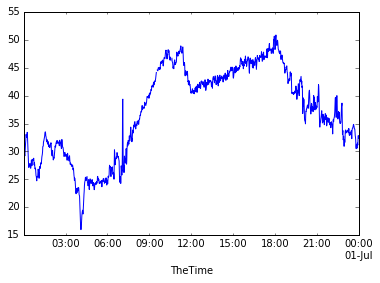

In [19]:
rack['TAPI_O3'].plot() # select a column

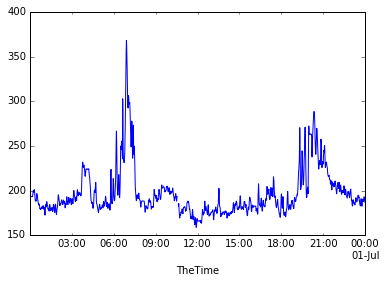

In [20]:
rack.TAPI_CO.plot() # easier way to select a column

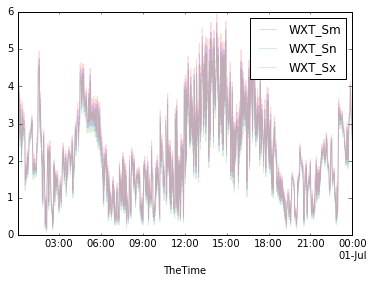

In [21]:
# select multiple columns with list of names
rack[['WXT_Sm', 'WXT_Sn', 'WXT_Sx']].plot(alpha=0.15) # alpha = transparency

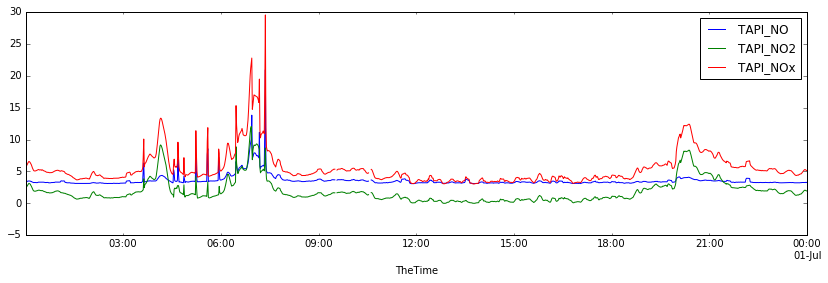

In [22]:
rack[['TAPI_NO', 'TAPI_NO2', 'TAPI_NOx']].plot(figsize=(14,4)) # bigger

In [23]:
li840a.columns

Index(['CO2(ppm)', 'H2O(ppt)', 'H2O(C)', 'Cell_Temperature(C)',
       'Cell_Pressure(kPa)'],
      dtype='object')

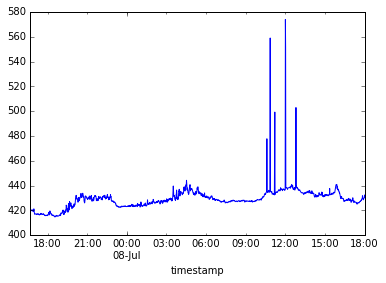

In [24]:
li840a['CO2(ppm)'].plot() # column names with funny characters require this selection method

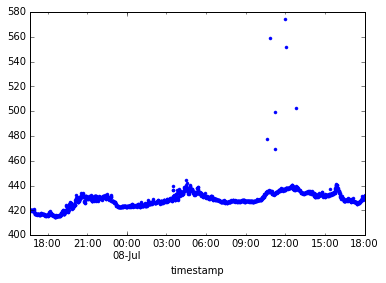

In [25]:
li840a['CO2(ppm)'].plot(style='.') # line plots can skew perception

## HINT using `.median`() instead of `.mean()` removes the spurious points

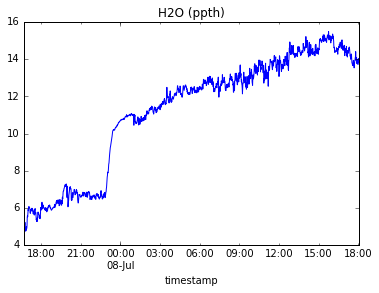

In [26]:
li840a['H2O(C)'].plot(title="H2O (ppth)") # titles

[<matplotlib.text.Text at 0x9329e80>, <matplotlib.text.Text at 0x92fbeb8>]

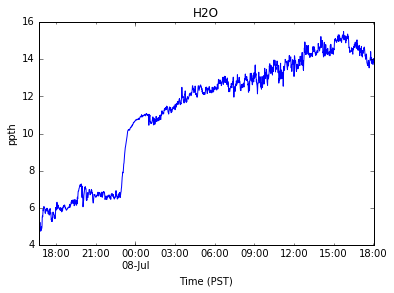

In [27]:
p1 = li840a['H2O(C)'].plot(title='H2O') # save the plot for advanced configuration
p1.set(ylabel='ppth', xlabel='Time (PST)') # like axis labels

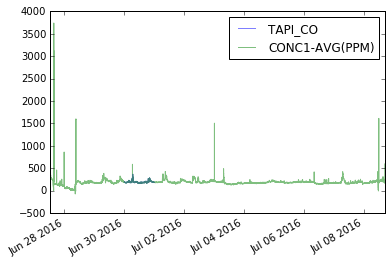

In [28]:
# build new dataframe with relevant columns, then plot
pd.DataFrame([rack.TAPI_CO, 1000*co['CONC1-AVG(PPM)']]).T.plot(alpha=0.5) # scale both to PPB